In [1]:
# Setup autoreload
%load_ext autoreload
%autoreload 2

# Setup matplotlib
%matplotlib inline

In [2]:
import matplotlib
import pandas as pd

import utils

## Path utility functions

A quick example on how to use the included utils module

In [3]:
# Get the project root
project_root = utils.project_path()
project_root

'/Users/manuel/Code/datasciencejob.de/data-science-python-setup'

In [4]:
# Get a path in your project
data_path = utils.path_to('data', 'climate-change-earth-surface-temperature-data', 'GlobalLandTemperaturesByCountry.csv')
data_path

'/Users/manuel/Code/datasciencejob.de/data-science-python-setup/data/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCountry.csv'

In [5]:
# Make sure all the directories in the path are created
utils.ensure_directories(data_path)

## Climate Change: Earth Surface Temperature Data

- Download the [data](https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data) from kaggle.
- Copy the zip file into `data-science-python-setup/data/` and unzip it

In [6]:
# Read the CSV into pandas
df = pd.read_csv(data_path, parse_dates=[0])
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [7]:
# Get the data for Germany
country = df[df['Country'] == 'Germany']  # Just change it to any other country and run the cells again!

# Drop the Country
country = country.drop(columns=['Country'])

# We skip the first couple of years with big spikes and a high uncertainty 
country = country[country['dt'] > '1760']

# Set the index to dt
country = country.set_index('dt')

country.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,3043.000000,3043.000000
mean,8.170229,1.461425
std,6.908371,1.934948
min,-9.298000,0.071000
25%,2.196000,0.232000
50%,8.076000,0.489000
75%,14.740000,2.045500
max,22.343000,13.954000


In [8]:
country_resampled = country.resample('A')
country_by_year = country_resampled.mean()
country_by_year['min'] = country_resampled.min()['AverageTemperature']
country_by_year['max'] = country_resampled.max()['AverageTemperature']

country_by_year.describe()

,AverageTemperature,AverageTemperatureUncertainty,min,max
count,254.000000,254.000000,254.000000,254.000000
mean,8.172031,1.461176,-2.476008,17.930689
std,0.788000,1.648214,2.450890,1.173854
min,5.905000,0.152417,-9.298000,15.186000
25%,7.642729,0.228271,-3.898250,17.166500
50%,8.191958,0.512333,-2.144500,17.918000
75%,8.677917,2.482146,-0.669500,18.636000
max,10.020417,6.763167,3.006000,22.343000


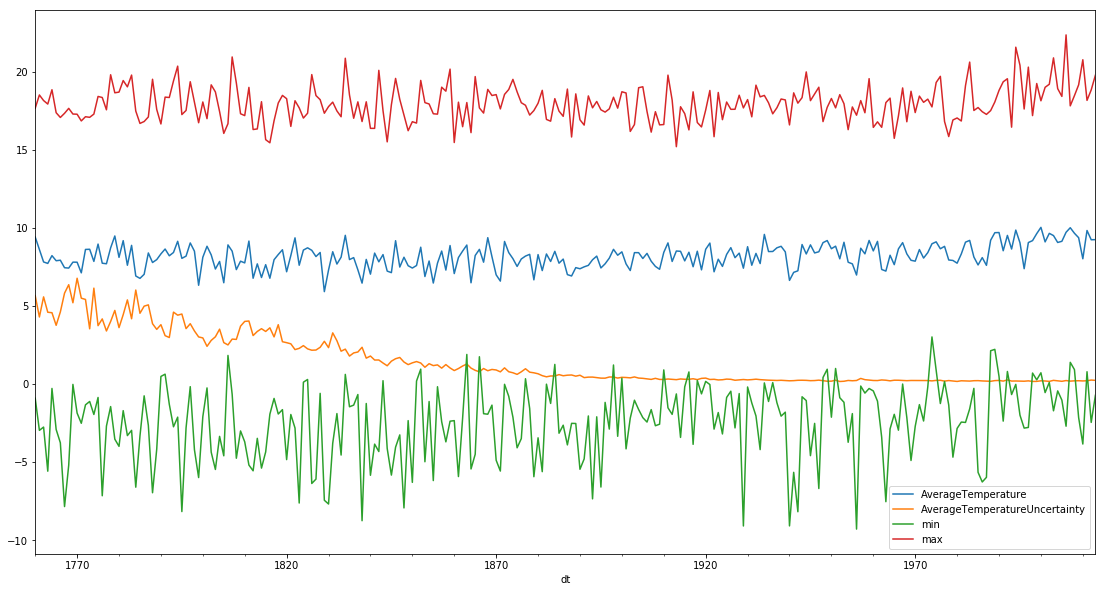

In [9]:
country_by_year.plot(kind='line', figsize=(19,10))

I'll leave it up to you to make sense of that data.